In [2]:
import cv2

def zoomed_roi(image_path, zoom_percentage=0.30):
    # Load the image
    image = cv2.imread(image_path)
    
    # Get image dimensions
    height, width, _ = image.shape
    
    # Calculate crop dimensions (30% zoom from each side)
    x_crop = int(width * zoom_percentage)
    y_crop = int(height * zoom_percentage)
    
    # Define new ROI coordinates (zoomed-in region)
    x1 = x_crop
    y1 = y_crop
    x2 = width - x_crop
    y2 = height - y_crop
    
    # Extract the ROI
    roi = image[y1:y2, x1:x2]
    
    # Draw the bounding box on the original image
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
    # Show the original image with the bounding box
    cv2.imshow("Original Image with ROI", image)
    
    # Show the zoomed-in ROI
    cv2.imshow("Zoomed ROI", roi)
    
    # Wait until a key is pressed and then close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
image_path = 'NoDB.jpg'  # Replace with your image path
zoomed_roi(image_path)

### Zoomed and Detection

No Doughball Detected: 2178 white pixels


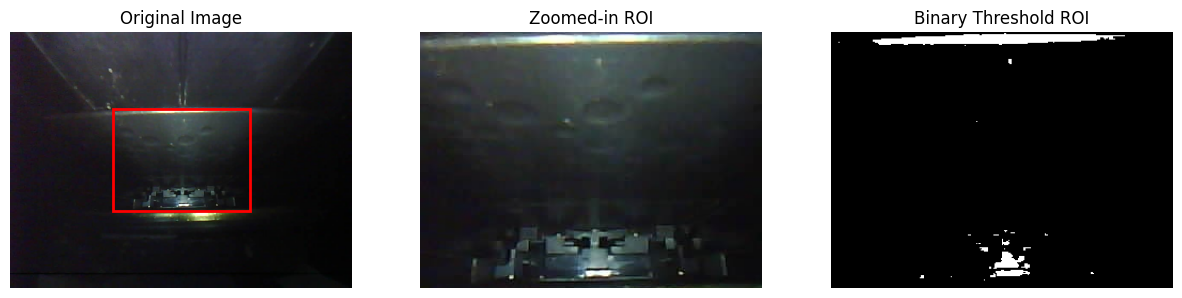

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoomed_roi_with_detection(image_path, output_path, zoom_percentage=0.30, threshold_value=127, white_pixel_threshold=2500):
    # Load the image
    image = cv2.imread(image_path)
    
    # Check if the image is loaded correctly
    if image is None:
        print("Error: Could not load image!")
        return
    
    # Get image dimensions
    height, width, _ = image.shape
    
    # Calculate crop dimensions (30% zoom from each side)
    x_crop = int(width * zoom_percentage)
    y_crop = int(height * zoom_percentage)
    
    # Define new ROI coordinates (zoomed-in region)
    x1 = x_crop
    y1 = y_crop
    x2 = width - x_crop
    y2 = height - y_crop
    
    # Extract the ROI
    roi = image[y1:y2, x1:x2]
    
    # Convert ROI to grayscale
    gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, binary_roi = cv2.threshold(gray_roi, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Calculate white pixel count
    white_pixels = cv2.countNonZero(binary_roi)
    
    # Check if the number of white pixels exceeds the threshold
    if white_pixels > white_pixel_threshold:
        print(f"Doughball Detected: {white_pixels} white pixels")
    else:
        print(f"No Doughball Detected: {white_pixels} white pixels")
    
    # Save the zoomed-in image
    cv2.imwrite(output_path, roi)
    
    # Visualize the images using matplotlib
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    # Convert BGR to RGB for matplotlib display
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
    
    axs[0].imshow(image_rgb)
    axs[0].set_title('Original Image')
    axs[0].add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, edgecolor='red', facecolor='none', linewidth=2))
    
    axs[1].imshow(roi_rgb)
    axs[1].set_title('Zoomed-in ROI')
    
    axs[2].imshow(binary_roi, cmap='gray')
    axs[2].set_title('Binary Threshold ROI')
    
    # Remove axis ticks
    for ax in axs:
        ax.axis('off')
    
    # Show the plots
    plt.show()

# Example usage
image_path = 'DB at release position/Trial 1.jpg'  # Replace with your image path
output_path = 'zoomed_roi.jpg'  # Output image path
zoomed_roi_with_detection(image_path, output_path)
